# ICSOutlier : Outlier Detection Using Invariant Coordinate Selection

##### Libraries Installation & Loading

In [1]:
install.packages("ggplot2")
install.packages("ICSOutlier")
install.packages("ICS")
install.packages("readr")
install.packages(c("FactoMineR", "factoextra"))
install.packages('mvtnorm')
install.packages("rrcov") 

package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pierr\AppData\Local\Temp\RtmpKEr48l\downloaded_packages
package 'ICSOutlier' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pierr\AppData\Local\Temp\RtmpKEr48l\downloaded_packages
package 'ICS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pierr\AppData\Local\Temp\RtmpKEr48l\downloaded_packages
package 'readr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pierr\AppData\Local\Temp\RtmpKEr48l\downloaded_packages
package 'FactoMineR' successfully unpacked and MD5 sums checked
package 'factoextra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pierr\AppData\Local\Temp\RtmpKEr48l\downloaded_packages
package 'mvtnorm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Us

also installing the dependencies 'DEoptimR', 'robustbase', 'pcaPP'



package 'DEoptimR' successfully unpacked and MD5 sums checked
package 'robustbase' successfully unpacked and MD5 sums checked
package 'pcaPP' successfully unpacked and MD5 sums checked
package 'rrcov' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\pierr\AppData\Local\Temp\RtmpKEr48l\downloaded_packages


In [2]:
library("ggplot2")
library("ICSOutlier")
library("readr")
library("ICS")
library("FactoMineR")
library("factoextra")
library("mvtnorm")
library("rrcov") 

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'ICSOutlier' was built under R version 3.6.3"Loading required package: ICS
Warning message:
"package 'ICS' was built under R version 3.6.3"Loading required package: mvtnorm
Warning message:
"package 'mvtnorm' was built under R version 3.6.2"Loading required package: moments
Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'FactoMineR' was built under R version 3.6.3"Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
"package 'rrcov' was built under R version 3.6.3"Loading required package: robustbase
Warning message:
"package 'robustbase' was built under R version 3.6.3"Scalable Robust Estimators with High Breakdown Point (version 1.5-2)



## I. Presentation

Invariante Coordinate Selection for outlier detection is a method proposed in the these of Aurore ARCHIBAUD "Methodes statistiques de détection d'observations atypiques pour des données en grande dimension" present in the folder. 

It is a methode of outlier detection based on Invariante Coordinate Selection proposed by Tyler in this [paper](https://rss.onlinelibrary.wiley.com/doi/pdf/10.1111/j.1467-9868.2009.00706.x).

You will find also an implementation of this methode in a R [packages](https://cran.r-project.org/web/packages/ICSOutlier/index.html) with its contain is discribed inside this [pdf](https://cran.r-project.org/web/packages/ICSOutlier/ICSOutlier.pdf).

ICS defines a better sub-space for the data separation. 

Its first step computes a pair of differents scatter matrix. 

Thanks to this two matrix and a system of equation defined in the these page 53, we can defined the matrix of the invariant components. 

Through the construction of this matrix of components, we can select the components which highlight the greatest differences between the groups. Indeed, we based on the fact that revelant components for displaying outlier do not follow a Gaussian distribution. We select the first components which do not follow a normal distribution. 

When our components are selected, we can project our data into this new space and apply our usual anomaly detection algorithms. 

### I.1. Method
ICS for outliers detection is based on the following three steps. We will use also a very simple exemple to illustrate every steps of this method. 

So let's take a every simple dataset as following : 

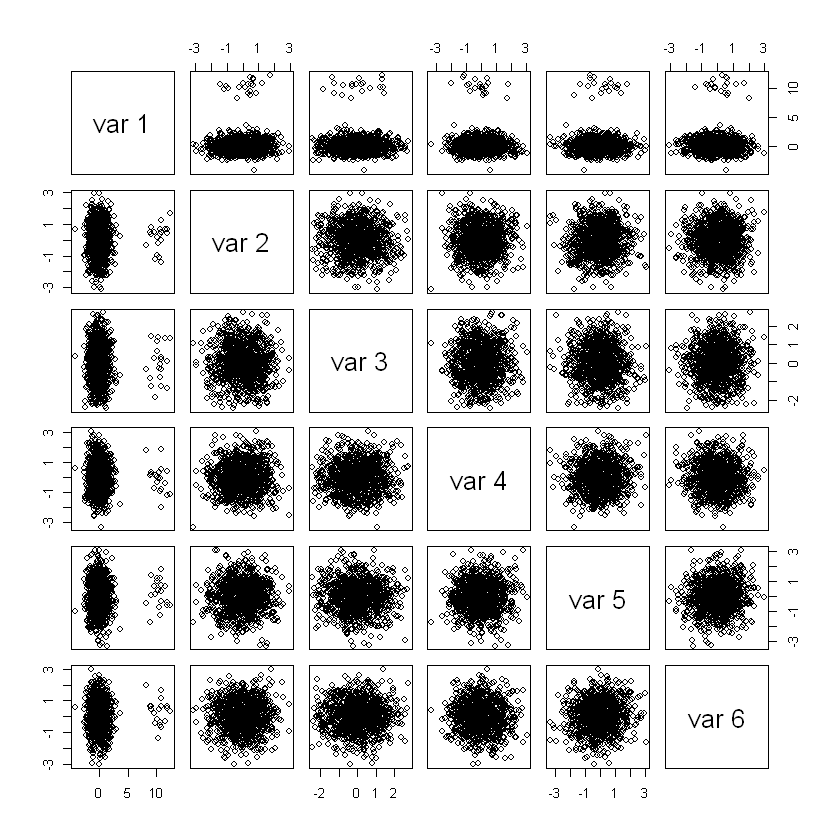

In [49]:
Z <- rmvnorm(1000, rep(0, 6)) #dataset of random variable following a gaussian law with 6 "variables"
# Add 20 outliers on the first component
Z[1:20, 1] <- Z[1:20, 1] + 10
pairs(Z)

#### I.1.1. Computation of two scatter matrix and of the components

The first step of this method is to compute two scatter matrix named S1 and S2 such as S1 is the classical scatter matrix (COV) and S2 is the 4th moments scatter matrix (COV4). 

Then we will compute Z the matrix of the compenents (each column is compenent) such that : 
- S1*Z = I where I is the identity matrix 
- S2*Z = D where D is a diagonal matrix
- then the elements of Z are ordered by their kurtosis

Now we have to select a number of significant composants. 

The fonction which realizes this step is ics2. 

In [29]:
ICS = ics2(Z, S1= MeanCov, S2 = Mean3Cov4)
ICS

$gSkew
[1] 0.643458393 0.031731838 0.043066120 0.024507768 0.056156125 0.001487088

$gKurt
[1] 3.6246753 1.0685010 1.0516667 1.0002963 0.9772842 0.9458575

$UnMix
             [,1]        [,2]        [,3]        [,4]        [,5]        [,6]
[1,] -0.576133411 -0.04022734  0.01303679  0.01292629 -0.02665249  0.01042366
[2,]  0.007002635 -0.35486617  0.24598223 -0.51620070 -0.76327520 -0.09762984
[3,]  0.005359298  0.63365857  0.14127103  0.18676034 -0.48720759  0.46319763
[4,] -0.019853671  0.20144603 -0.46908004 -0.69613397  0.28254314  0.36913505
[5,] -0.013411468  0.59262055 -0.24003091 -0.14280376 -0.17836914 -0.74208220
[6,]  0.014836398  0.26133999  0.82686734 -0.33355677  0.33604243 -0.11177726


Z is the displayed matrix. Let's see how many compenents we are going to select. 

#### I.1.2. Selection of the components  (choice between 2 methods)

In order to know how many component(s) we have to select we have to choose between two possible methodes. This two methods allow us to select only non-Gaussian components. 


One of this methode based on a Parallael Analysis with Monte Carlo simulations. Indeed, it identifies invariant coordinates that are nonnormal using simulations under a standard multivariatenormal model for a specific data setup and scatter combination. The sub fonction of ICSOutlier which implement this method is comp.sim.test(). 

In [30]:
comp.simu.test(ICS, m = 400, ncores = 1)

$index
[1] 1

$test
[1] "simulation"

$criterion
[1] 1.1083312 1.0709730 1.0366170 1.0128623 0.9924574 0.9620943

$levels
[1] 0.050000000 0.025000000 0.016666667 0.012500000 0.010000000 0.008333333

$adjust
[1] TRUE

$type
[1] "smallprop"

$m
[1] 400

Following this method, we have to select the first three components. 

The other method is is based on a selection of the component which follow a non Gaussian distribution. Indeed, it identifies invariant coordinates that are non normal using univariate normality tests. The sub fonction of ICSOutlier which implement this method is comp.norm.test(). 

In [31]:
comp.norm.test(ICS, test = "bo")

$index
[1] 1

$test
[1] "bonett.test"

$criterion
      IC.1       IC.2       IC.3       IC.4       IC.5       IC.6 
0.00000000 0.51904155 0.13758899 0.82899370 0.30677189 0.01576544 

$levels
[1] 0.050000000 0.025000000 0.016666667 0.012500000 0.010000000 0.008333333

$adjust
[1] TRUE

$type
[1] "smallprop"

Whereas the previous, this method advice us to choose only the first two components. 

The choice of the method is a hyperparameter of ICS. 

#### I.1.3. Outliers identification

Now we have selected our significant componants, we can go to the last step : identify outliers. 

We will project our data in our selected composants and compute the Mahalanobis distance (Euclidean squared distance). The sub function which calculates this distance is ics.ditance(). 

In [35]:
ICS.dist <- ics.distances(ICS, index = 1)
#ICS.dist #The matrix of Malahanobis distance

Then we will plot the Malahanobis distance of each observations as a function of their index. 

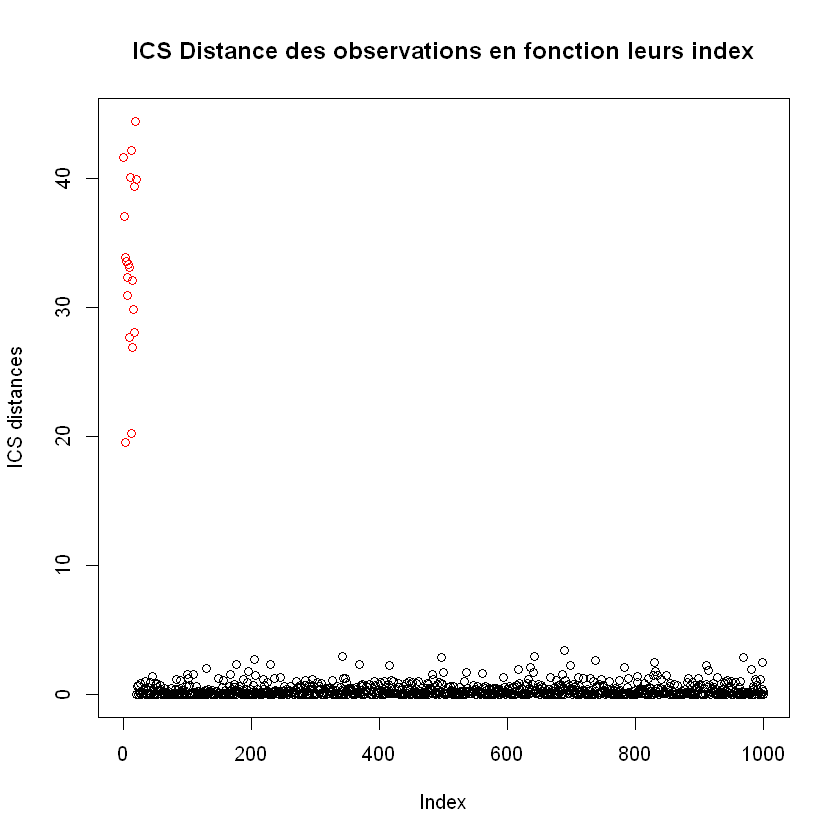

In [33]:
plot(ICS.dist, col = rep(2:1, c(20, 980)), main = "ICS Distance des observations en fonction leurs index", xlab = "Index", ylab="ICS distances" ) 

The greater the distance, the more sure you are identifying an anomaly. But now you need a cut-line to determine what is an outlier and what is not. The sub fonction implemented for that is dist.simu.test. Indeed, it computes the cut-off values for the identification of the outliers based on the squared ICS distances.It uses simulations under a multivariate standard normal model for a specific data setup and scatterscombination.

In [36]:
CutOff <- dist.simu.test(ICS, 1, m = 500, ncores = 1)
CutOff

97.5% 
5.246459

So we can finnaly plot : 

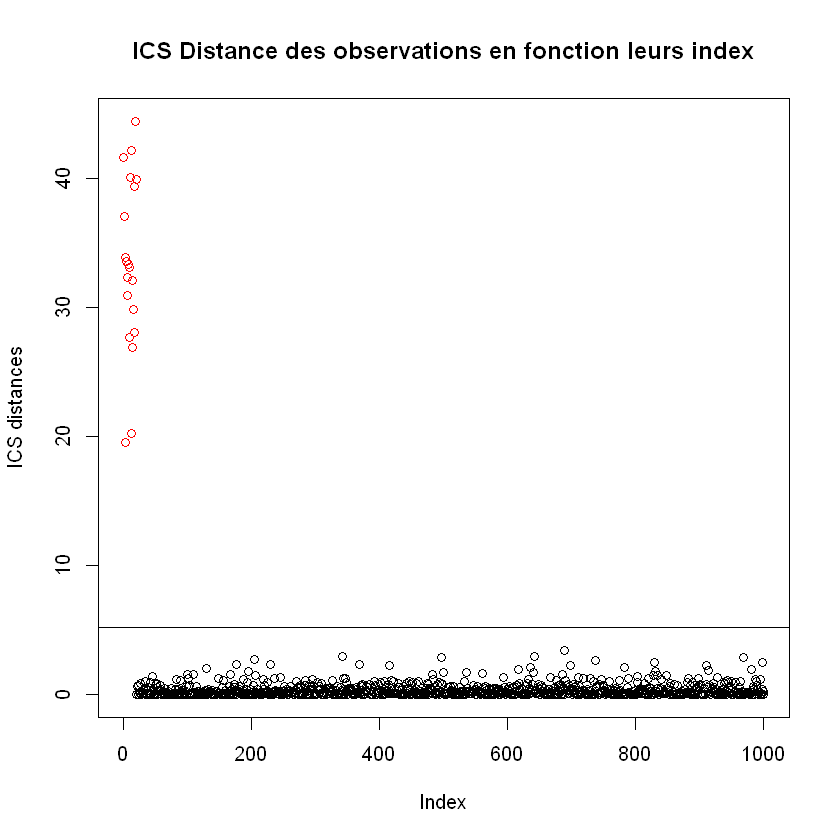

In [37]:
plot(ICS.dist, col = rep(2:1, c(20, 980)), main = "ICS Distance des observations en fonction leurs index", xlab = "Index", ylab="ICS distances" ) 
abline(h = CutOff, main = "Cut-off")

As seen in red, we have identify our outliers. 

### I.2. Comparaison between PCA et ICS 

PCA and ICS are "Projection Pursuit" (Projections Révélatrices) methods. This means that they are looking for a lower dimension projection subspace in which an interesting structure appears.

ICS is a generalization of the PCA.

ICS is affine invariante whereas PCA is orthogonal invariant. 

The affine invariance is the ability to be free from the different units and scales of values. But a pre-processing of data such like normalization/standardization leads to the same result. 

The orthogonal invariance has no real physic sens, but is a important property that allows the projection in a sub-space of uncorrelated variables for the PCA. 

The following example will show us that ICS better group data of the same type and accentuate the spaces between two categories than PCA. 

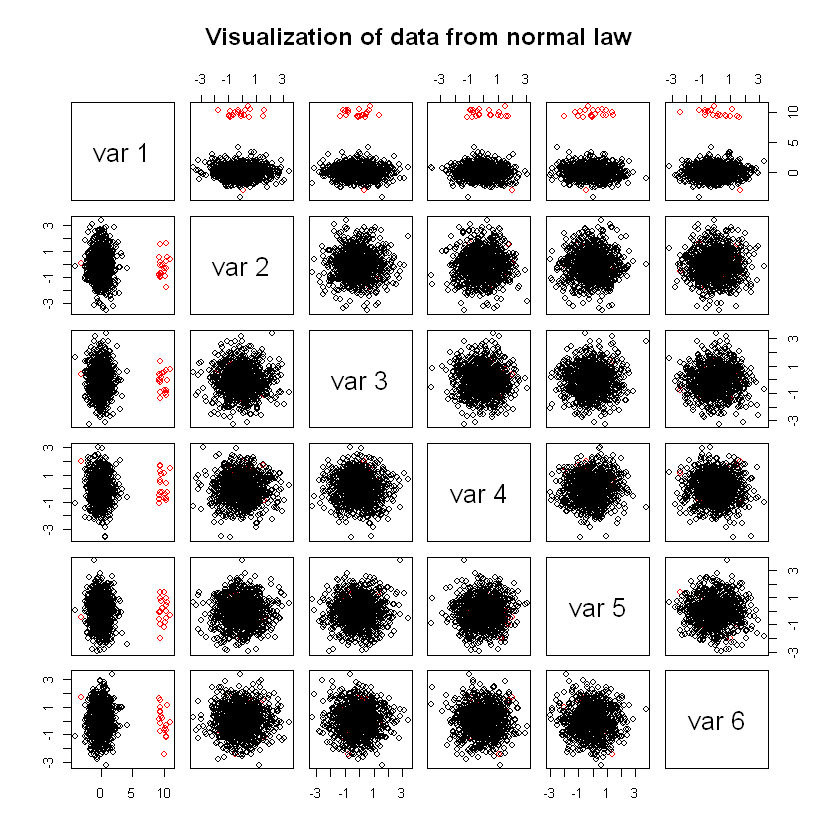

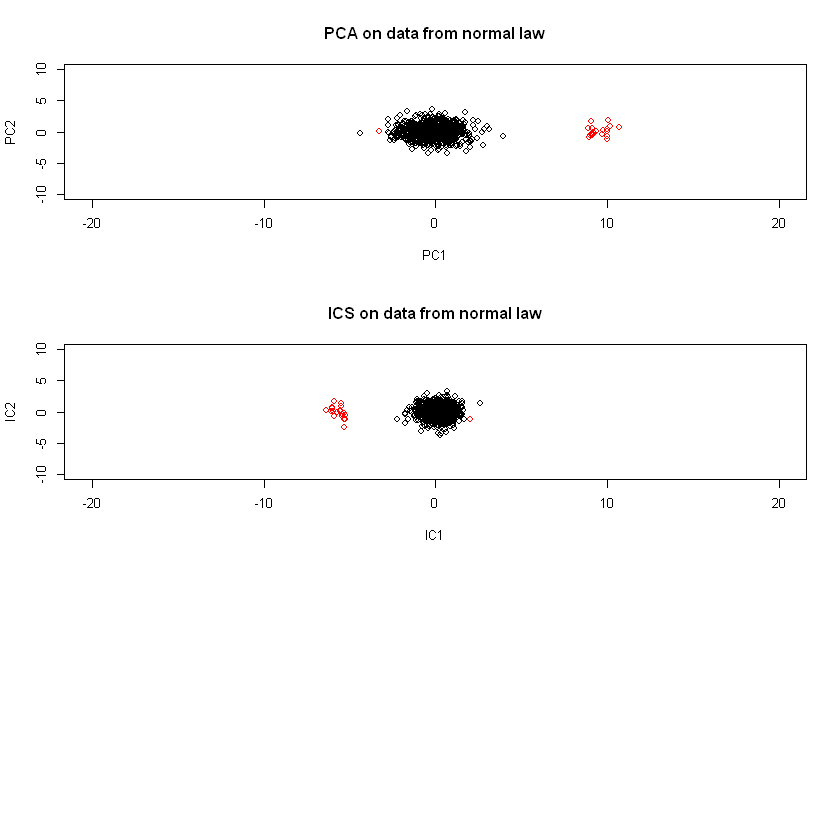

In [14]:
Z <- rmvnorm(1000, rep(0, 6))
# Add 20 outliers on the first component
Z[1:20, 1] <- Z[1:20, 1] + 10

#PCA
pca <- PcaClassic(Z, k=2)
ScoresPCA = data.frame(pca$scores)

#ICS
icsZ <- ics2(Z)
Scores <- data.frame(icsZ@Scores)


#Visualization
par(mfrow=c(3,1))
pairs(Z, col = rep(2:1, c(21, 1000)), main = "Visualization of data from normal law")
plot(ScoresPCA$PC1,ScoresPCA$PC2, col = rep(2:1, c(21, 1000)), main="PCA on data from normal law" , xlab="PC1", ylab="PC2", ylim=c(-10,10), xlim =c(-20,20))
plot(Scores$IC.1,Scores$IC.2, col = rep(2:1, c(21, 1000)), main="ICS on data from normal law", xlab="IC1", ylab="IC2", ylim=c(-10,10), xlim =c(-20,20))

The following example, will show the importance of standardization for the PCA whereas ICS does not need  this pre-processing. 

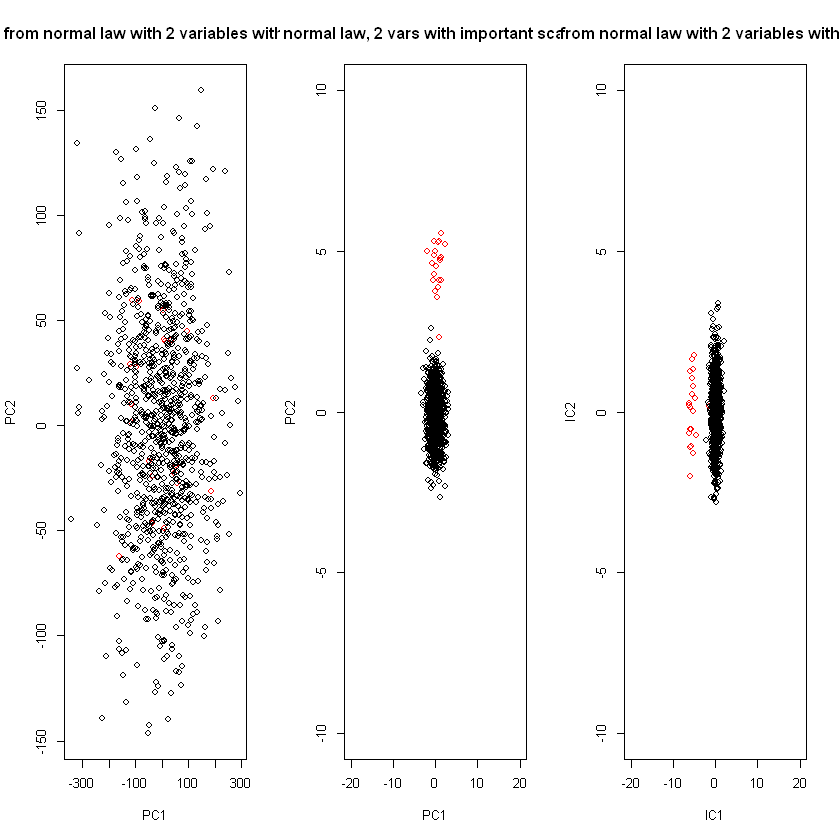

In [15]:
Y <- rmvnorm(1000, rep(0, 6))
# Add 20 outliers on the first component
Y[1:20, 1] <- Y[1:20, 1] + 10
# We increase the scale of two variables
Y[,2] =Y[,2]*50
Y[,6] =Y[,6]*100

#PCA 
pca3 <- PcaClassic(Y, k=2)
ScoresPCA3 = data.frame(pca3$scores)

#Standarization
Ynorm = scale(Y, center = TRUE, scale = TRUE)

#PCA with standardization 
pca3norm <- PcaClassic(Ynorm, k=2)
ScoresPCA3norm = data.frame(pca3norm$scores)


#ICS 
icsY <- ics2(Y)
ScoresY <- data.frame(icsY@Scores)

#Visualization
par(mfrow=c(1,3))
plot(ScoresPCA3$PC1,ScoresPCA3$PC2, col = rep(2:1, c(21, 1000)), main="PCA on data from normal law with 2 variables with important scale", xlab="PC1", ylab="PC2")
plot(ScoresPCA3norm$PC1,ScoresPCA3norm$PC2, col = rep(2:1, c(21, 1000)), main="PCA, data from normal law, 2 vars with important scale, standardisation", xlab="PC1", ylab="PC2", ylim=c(-10,10), xlim =c(-20,20))
plot(ScoresY$IC.1,ScoresY$IC.2, col = rep(2:1, c(21, 1000)), main="ICS on data from normal law with 2 variables with important scale", xlab="IC1", ylab="IC2", ylim=c(-10,10), xlim =c(-20,20))

This last illustration will show you that if we choose an other law (other than normal distribition), the difference of  PCA and ICS is small. Their will be false alarm in both case, but maybe a little less for the ICS.

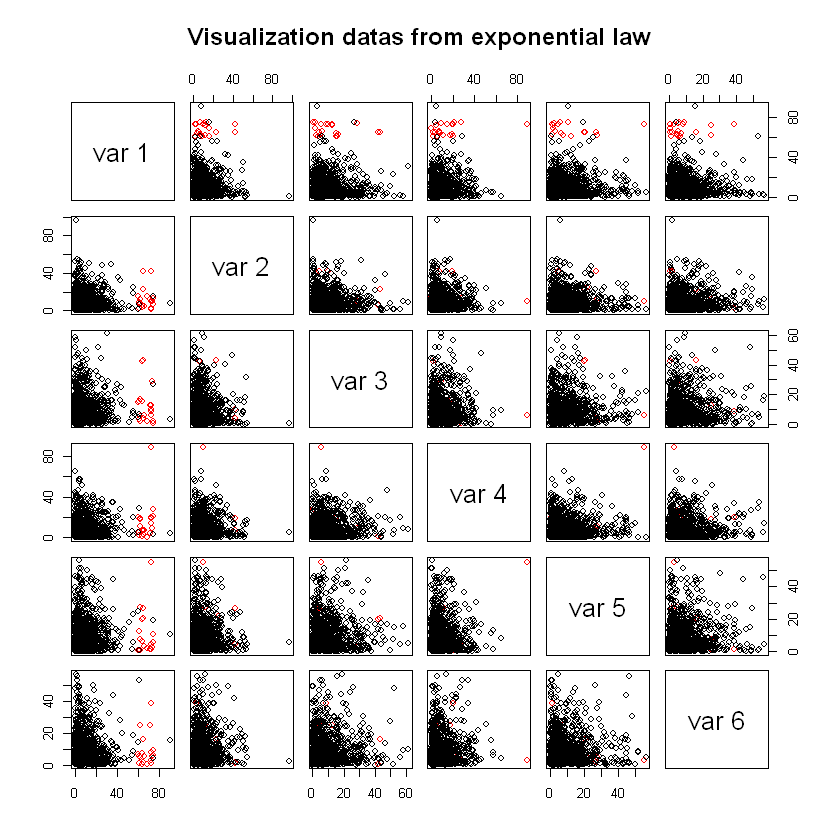

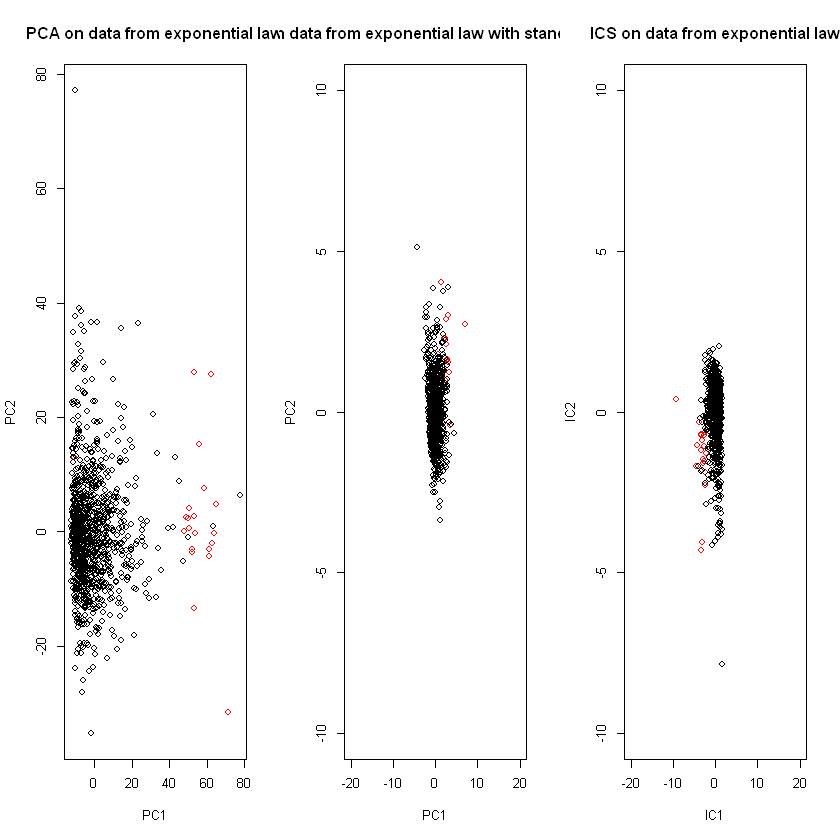

In [18]:
# Generation of a matrix of exponential law
X<-matrix(rexp(6000, rate=.1), ncol=6, nrow=1000)
# Add 20 outliers on the first component
X[1:20, 1] <- X[1:20, 1] + 60

#ACP
pca2 <- PcaClassic(X, k=2)
ScoresPCA2 = data.frame(pca2$scores)

#Standardization
Xnorm = scale(X, center = TRUE, scale = TRUE)

#PCA with standardisation 
pca2norm <- PcaClassic(Xnorm, k=2)
ScoresPCA2norm = data.frame(pca2norm$scores)

#ICS
icsX <- ics2(X)
ScoresX <- data.frame(icsX@Scores)

#Visualization
pairs(X, col = rep(2:1, c(21, 1000)), main = "Visualization datas from exponential law")
par(mfrow=c(1,3))
plot(ScoresPCA2$PC1,ScoresPCA2$PC2, col = rep(2:1, c(21, 1000)), main="PCA on data from exponential law", xlab="PC1", ylab="PC2")
plot(ScoresPCA2norm$PC1,ScoresPCA2norm$PC2, col = rep(2:1, c(21, 1000)), main="PCA on data from exponential law with standardisation", xlab="PC1", ylab="PC2", ylim=c(-10,10), xlim =c(-20,20))
plot(ScoresX$IC.1,ScoresX$IC.2, col = rep(2:1, c(21, 1000)), main="ICS on data from exponential law", xlab="IC1", ylab="IC2", ylim=c(-10,10), xlim =c(-20,20))

Nota bene : due to the randomness, many anomalies are difficult to extract from normal behavior. But when it does, ICS is always better than PCA for separation, and have less fake alarms. 

## II. Application on Human Activity Recognition :  a Time Series Dataset

### II.1. Human Activity Recognition

The objective of this datas is to recognize the activity of an individual from a set of signals recorded on a smartphone from the embedded gyroscope and accelerometer. A learning database has been built experimentally. A set of persons  performed a determined activity for a predefined period of time while signals were recorded. The data come from the community that aims to recognize human activities (Human activity recognition, HAR). See the [paper](https://www.elen.ucl.ac.be/Proceedings/esann/esannpdf/es2013-11.pdf) on a symposium in 2013. The analysis of data associated with real-time activity identification is not discussed.

The available public data was acquired, described and partly analyzed by [Anguita et al. (2013)](https://www.icephd.org/sites/default/files/IWAAL2012.pdf). They are available on the University California Irvine (UCI) [repository](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) dedicated to machine learning.


In [38]:
HAR = read.csv("./HumanActivityRecognition/test/X_test.txt" ,header = FALSE, sep = "" )
label = read.csv("./HumanActivityRecognition/test/y_test.txt" ,header = FALSE, sep = "")
HAR[,"label"] = label
head(HAR)
nrow(HAR)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V553,V554,V555,V556,V557,V558,V559,V560,V561,label
0.2571778,-0.02328523,-0.01465376,-0.9384040,-0.9200908,-0.6676833,-0.9525011,-0.9252487,-0.6743022,-0.8940875,...,-0.3303704,-0.7059739,0.006462403,0.16291982,-0.82588562,0.27115145,-0.7200093,0.2768010,-0.05797830,5
0.2860267,-0.01316336,-0.11908252,-0.9754147,-0.9674579,-0.9449582,-0.9867988,-0.9684013,-0.9458234,-0.8940875,...,-0.1218451,-0.5949439,-0.083494968,0.01749957,-0.43437455,0.92059323,-0.6980908,0.2813429,-0.08389801,5
0.2754848,-0.02605042,-0.11815167,-0.9938190,-0.9699255,-0.9627480,-0.9944034,-0.9707350,-0.9634827,-0.9392603,...,-0.1904219,-0.6407357,-0.034956250,0.20230203,0.06410335,0.14506843,-0.7027715,0.2800830,-0.07934620,5
0.2702982,-0.03261387,-0.11752018,-0.9947428,-0.9732676,-0.9670907,-0.9952743,-0.9744710,-0.9688974,-0.9386098,...,-0.3444180,-0.7361238,-0.017067021,0.15443783,0.34013408,0.29640709,-0.6989538,0.2841138,-0.07710800,5
0.2748330,-0.02784779,-0.12952716,-0.9938525,-0.9674455,-0.9782950,-0.9941114,-0.9659526,-0.9773460,-0.9386098,...,-0.5346849,-0.8465952,-0.002222652,-0.04004639,0.73671509,-0.11854473,-0.6922450,0.2907220,-0.07385681,5
0.2792199,-0.01862040,-0.11390197,-0.9944552,-0.9704169,-0.9653163,-0.9945851,-0.9694806,-0.9658969,-0.9378563,...,-0.4935174,-0.8575645,-0.095680522,0.04884881,0.76068392,-0.07221636,-0.6898161,0.2948958,-0.06847070,5


[1] 2947

In [39]:
#summary(HAR)

The data are labelled as following : 

1 : "WALKING",

2 : "WALKING UPSTAIRS",

3 : "WALKING DOWNSTAIRS",

4 : "SITTING",

5 : "STANDING",

6 : "LAYING"

In [40]:
# Extraction of the series index for each kind of mouvment

walking = as.numeric(array(rownames(HAR)))*array(HAR$label == 1)*1
walking = walking[walking > 0]

walking_up = as.numeric(array(rownames(HAR)))*array(HAR$label == 2)*1
walking_up = walking_up[walking_up > 0]

walking_down = as.numeric(array(rownames(HAR)))*array(HAR$label == 3)*1
walking_down = walking_down[walking_down > 0]

sitting = as.numeric(array(rownames(HAR)))*array(HAR$label == 4)*1
sitting = sitting[sitting > 0]

standing = as.numeric(array(rownames(HAR)))*array(HAR$label == 5)*1
standing = standing[standing > 0]

laying = as.numeric(array(rownames(HAR)))*array(HAR$label == 6)*1
laying = laying[laying > 0]


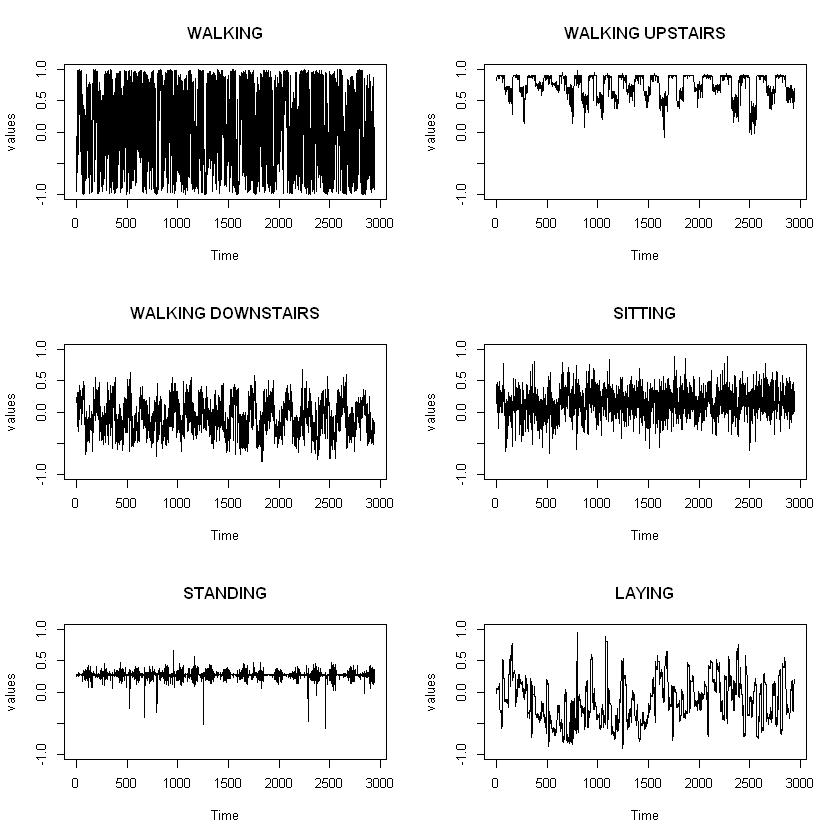

In [41]:
par(mfrow=c(3,2))
plot.ts(HAR[,walking[1]], ylab = "values", ylim = c(-1,1), main = "WALKING")
plot.ts(HAR[,walking_up[1]], ylab = "values", ylim = c(-1,1), main = "WALKING UPSTAIRS")
plot.ts(HAR[,walking_down[1]], ylab = "values", ylim = c(-1,1), main = "WALKING DOWNSTAIRS")
plot.ts(HAR[,sitting[1]], ylab = "values", ylim = c(-1,1), main = "SITTING")
plot.ts(HAR[,standing[1]], ylab = "values", ylim = c(-1,1), main = "STANDING")
plot.ts(HAR[,laying[1]], ylab = "values", ylim = c(-1,1), main = "LAYING")


### II.2. ICS application on HAR

In order to test ICS on HAR, we create a data set which contains "outliers" based on the following process : 

- We choose to set 'WALKING' labeled data as our nominal behavior. Their is 496 times series of it. 
- We choose to add 'LAYING' labeled data as our outliers. We add 26 at the end of our dataset. 

So we obtain a data set with 5% of outliers which indexed from 497 to 562. 


In [8]:
data5 = read.csv(file ="data5")
# del of the columns : index and label 
data5 <- data5[,2:562]
head(data5)

X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X551,X552,X553,X554,X555,X556,X557,X558,X559,X560
0.2039624,-0.032344520,-0.09688123,-0.4655036,-0.18078545,-0.4551076,-0.4978823,-0.2424984000,-0.4584062,-0.1796957,...,0.1088738,-0.2098527,-0.5862877,0.4801295,0.61932877,0.8929204,-0.3116931,-0.6756932,0.3219856,0.008134051
0.2493432,-0.003410981,-0.05604157,-0.3994764,-0.13784483,-0.4612707,-0.4372462,-0.1986050900,-0.4533399,-0.1796957,...,0.2674170,-0.4956456,-0.8086605,0.2585288,0.03829751,0.9046969,-0.4218749,-0.6700092,0.3257287,0.004459262
0.3250505,-0.029803725,-0.07784718,-0.4651195,0.01345277,-0.3676459,-0.5000041,-0.0323798140,-0.3418663,-0.3392424,...,0.3721469,-0.6007378,-0.8649353,-0.5364584,-0.49250082,-0.6221425,-0.4096331,-0.6711009,0.3247470,0.001002309
0.3088081,-0.022128064,-0.13210431,-0.5148263,0.03200887,-0.3490028,-0.5537178,-0.0001614734,-0.3120350,-0.3922789,...,0.2604946,0.0465743,-0.2345489,-0.4442365,0.22470917,-0.8364643,-0.6039488,-0.6719037,0.3243482,0.003295673
0.2655992,-0.015936305,-0.12074953,-0.5009497,-0.16322961,-0.3894277,-0.5372178,-0.1592715900,-0.3676185,-0.3029212,...,0.3243071,-0.2947359,-0.6438886,0.3710013,0.73107653,-0.8553785,-0.1119207,-0.6763907,0.3214381,0.006703592
0.1874192,-0.011533248,-0.10650963,-0.4508537,-0.19630865,-0.4598695,-0.5046396,-0.1915143100,-0.4376160,-0.3029212,...,0.2199150,-0.4124998,-0.7518317,0.9050923,-0.31824439,-0.7602108,-0.4756948,-0.6782115,0.3200670,0.004610043


Now we will apply ICS on data5 and analyse the results. We will only apply ICS on a window of 40 points for each series. 

The two following plots with the same scale will show the difference between the outlier behavior and the nominal behavior on the selected windows. 

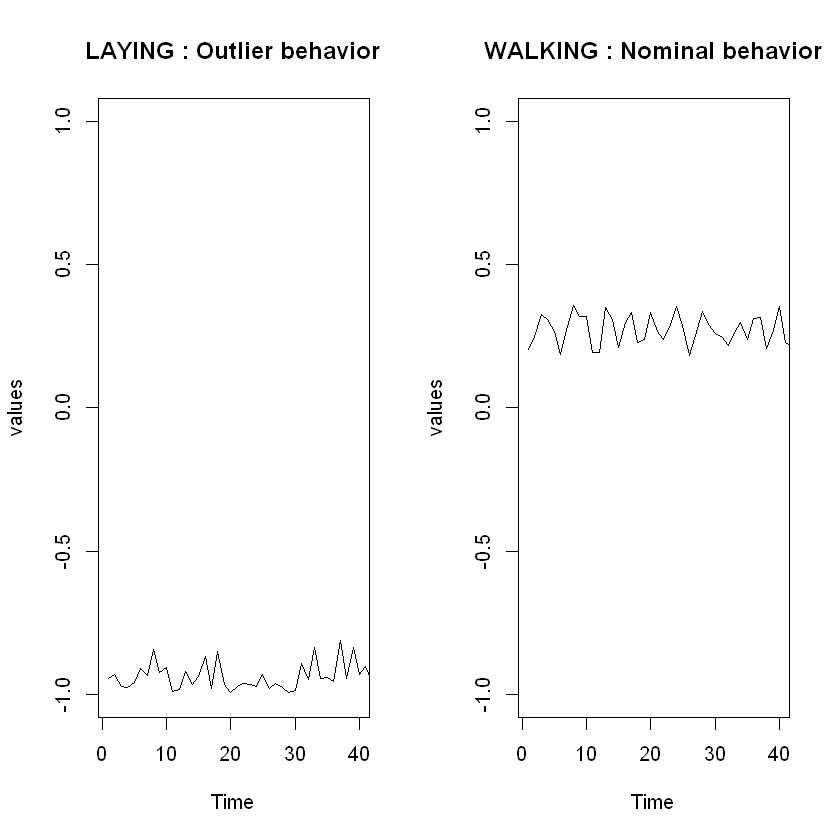

In [43]:
par(mfrow=c(1,2))
plot.ts(data5[,500], main = "LAYING : Outlier behavior", ylab = "values", ylim = c(-1,1), xlim = c(1,40))
plot.ts(data5[,1], main = "WALKING : Nominal behavior", ylab = "values", ylim = c(-1,1), xlim = c(1,40))

In [44]:
ICS <- ics2(data5[,1:40], S1 = tM, S2 = MeanCov)
icsOutlier <- ics.outlier(ICS, level.dist = 0.01, mDist = 50)
icsOutlier 
summary(icsOutlier)

[1] "3 components were selected and 40 outliers were detected."


ICS based on two scatter matrices and two location estimates
S1:  tM
S2:  MeanCov

Searching for a small proportion of outliers

Components selected at nominal level 0.05: 3
Selection method: norm.test (agostino.test)
Number of outliers at nominal level 0.01: 40


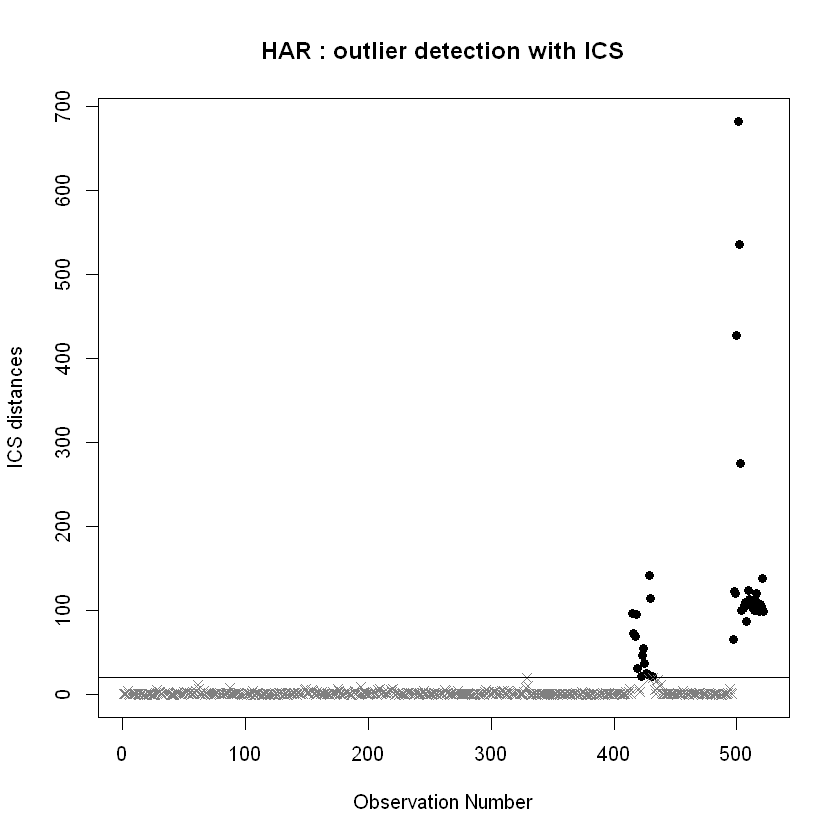

In [45]:
plot(icsOutlier, main = "HAR : outlier detection with ICS")

We observe that our 26 abnormal series added at the end of our dataset are correctly detected by ICS. Indeed, it corresponds of the last group of points of the previous plot. 

Whereas, we also identify an other group of outliers. First, we will obtain the index of the series identify as outliers. Then, we will plot them. 

In [46]:
vec_anom = array(names(icsOutlier@outliers[icsOutlier@outliers == 1]))
vec_anom = as.numeric(vec_anom)

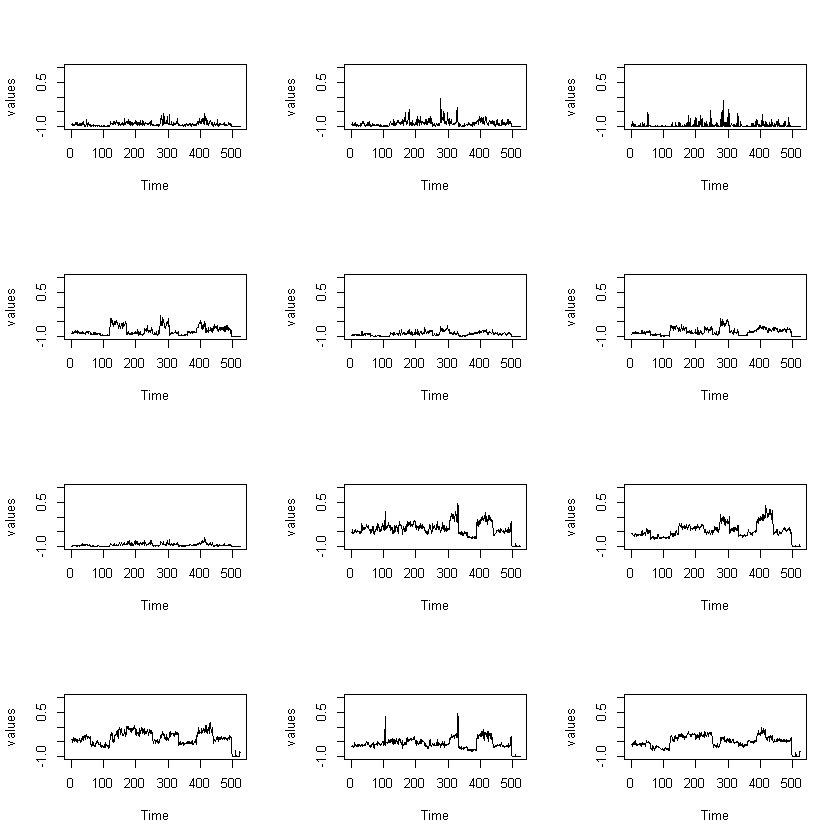

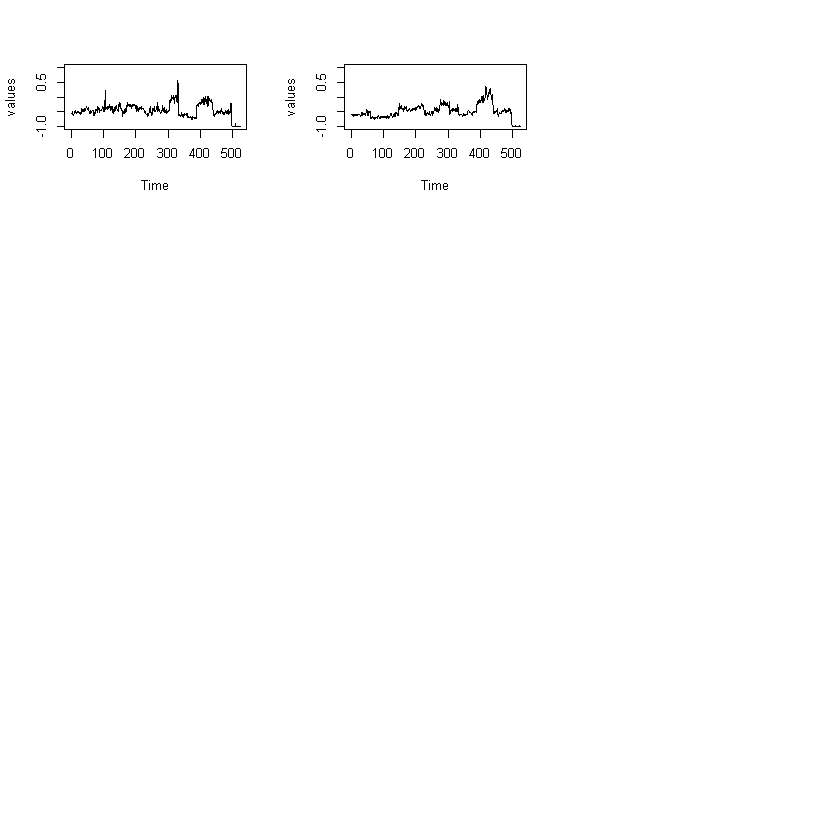

In [47]:
par(mfrow=c(4,3))
for (i in vec_anom[1:14]){
    plot.ts(data5[,i], ylab = "values", ylim = c(-1,1))}

We observe that some of them are finally outliers too. The others are closed to the nominal behavior but it can be discuss. 

In [48]:
# Vector of outliers predicted by ICS
pred_anom = array(icsOutlier@outliers)
# Vector of real outliers 
data5_anom = rep(0,nrow(data5))
for (i in 497:522){data5_anom[i] = 1}
# Confusion matrix
table(data5_anom,pred_anom)

          pred_anom
data5_anom   0   1
         0 482  14
         1   0  26

## III. ICS on your on data

In order to apply ICS on your data, you have to uncomment all the following lines. 

You can load your data as following : 

In [ ]:
#YourData = read.csv(file ="path")
#head(YourData)

After you can apply ICS on them and see how many composants are selected and how many outliers are identified. 

In [ ]:
#ICSDATA <- ics2(YourData, S1 = tM, S2 = MeanCov) # you can choose as scatter matrix combinaison between tM, MeanCov and Mean3Cov4
#icsOutlierDATA <- ics.outlier(ICSDATA, level.dist = 0.01, mDist = 50) 
#icsOutlierDATA 
#summary(icsOutlierDATA)

Finaly you have a graphic reprensentation of the previous results. 

In [ ]:
#plot(icsOutlierDATA, main = "YourData : outlier detection with ICS")

Nota Bene : sometimes ICS does not apply. You have two possiblities : 

- it can not compute one of the two scatter mattrix needded because the algortihms do not converge.
- it can not solve the system needed to determine the matrix of invariant components, beacause the algorithm does not converge. 
